In [20]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_csv = "../matplotlib/city_data.csv"
ride_data_csv = "../matplotlib/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_csv)
ride_data = pd.read_csv(ride_data_csv)

# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, on = "city")

In [21]:
# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

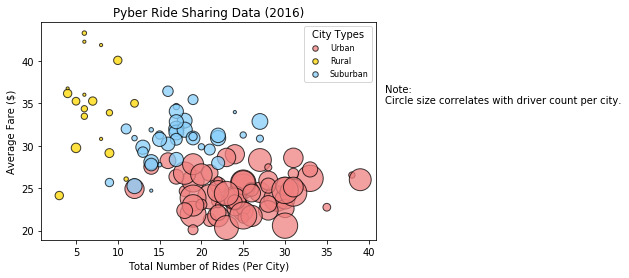

In [32]:
# Obtain the x and y coordinates for each of the three city types
urban_city = pyber_data[pyber_data["type"] == "Urban"].groupby([pyber_data["city"]])
rural_city = pyber_data[pyber_data["type"] == "Rural"].groupby([pyber_data["city"]])
suburban_city = pyber_data[pyber_data["type"] == "Suburban"].groupby([pyber_data["city"]])

urban_x = urban_city["ride_id"].count()
urban_y = urban_city["fare"].mean()
urban_z = urban_city["driver_count"].mean()

rural_x = rural_city["ride_id"].count()
rural_y = rural_city["fare"].mean()
rural_z = rural_city["driver_count"].mean()

suburban_x = suburban_city["ride_id"].count()
suburban_y = suburban_city["fare"].mean()
suburban_z = suburban_city["driver_count"].mean()
                        
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, label = "Urban", s=urban_z * 10, color=["lightcoral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(rural_x, rural_y, label = "Rural", s=rural_z * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(suburban_x, suburban_y, label = "Suburban", s=suburban_z * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("../matplotlib/Pyber_bubble_plt.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

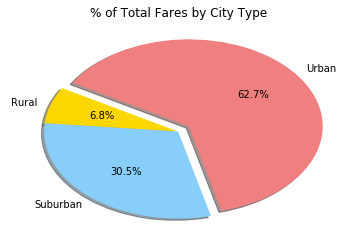

In [23]:
# Calculate Type Percents
types = pyber_data.groupby(['type'])
fare_sum = types['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../matplotlib/Pyber_total_fares_scatter_plt.png")

In [24]:
# Show Figure
plt.show()

## Total Rides by City Type

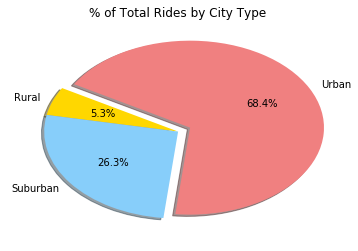

In [25]:
# Calculate Ride Percents
rides_count = types['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../matplotlib/Pyber_total_rides_scatter_plt.png")

In [26]:
# Show Figure
plt.show()

## Total Drivers by City Type

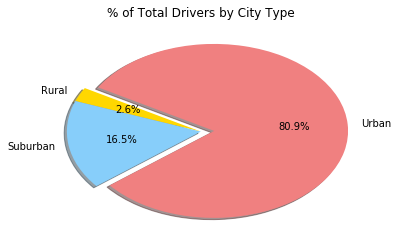

In [27]:
# Calculate Driver Percents
types_drivers = city_data.groupby(['type'])
drivers_sum = types_drivers['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../matplotlib/Pyber_total_drivers_scatter_plt.png")

In [28]:
# Show Figure
plt.show()